In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.metrics import precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
dataset=pd.read_csv('diabetes_data_upload.csv')

In [5]:
len(dataset)

520

In [6]:
dataset.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [7]:
print(dataset.columns)

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')


KeyError: 'Class'

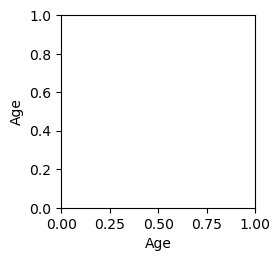

In [8]:
sns.pairplot(dataset, hue='Class')
plt.show()

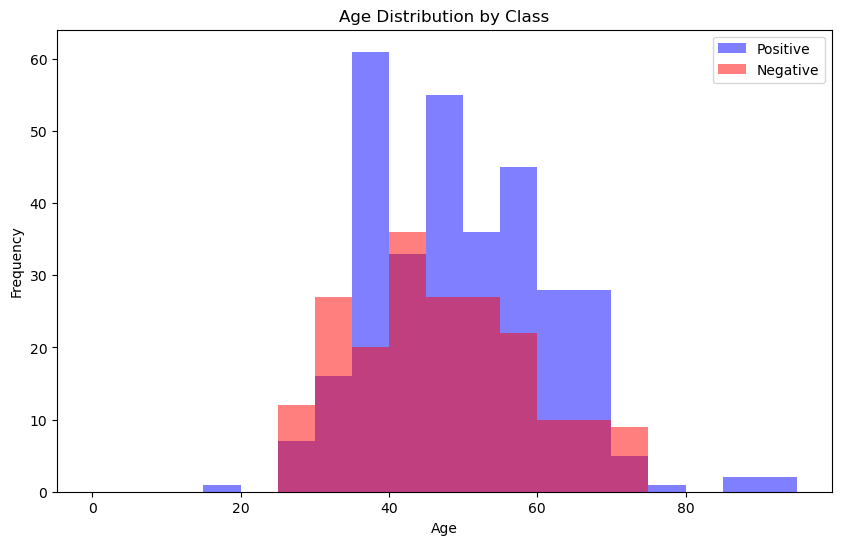

In [56]:
plt.figure(figsize=(10, 6))
plt.hist(dataset[dataset['Class'] == 1]['Age'], bins=range(0, 100, 5), alpha=0.5, color='blue', label='Positive')
plt.hist(dataset[dataset['Class'] == 0]['Age'], bins=range(0, 100, 5), alpha=0.5, color='red', label='Negative')
plt.title('Age Distribution by Class')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

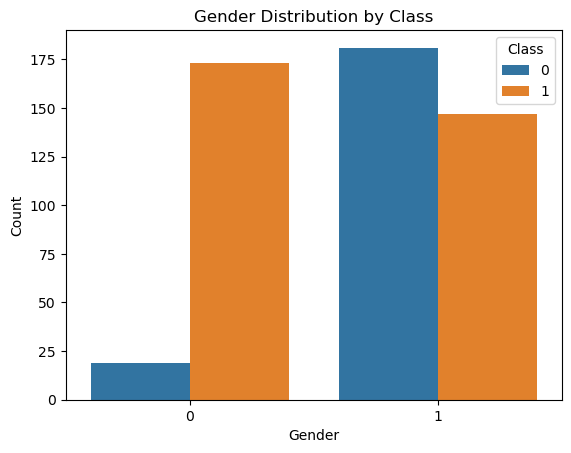

In [59]:
sns.countplot(x='Gender', hue='Class', data=dataset)
plt.title('Gender Distribution by Class')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

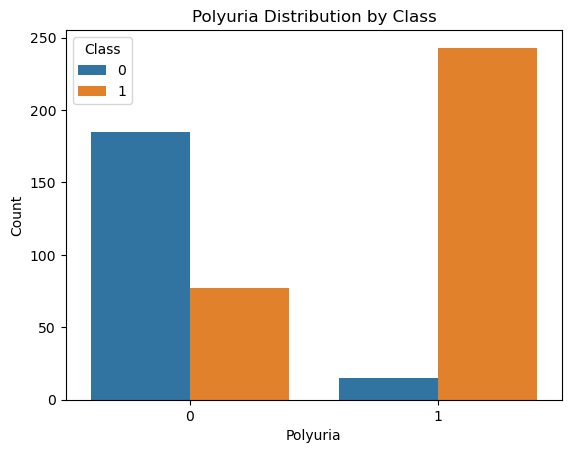

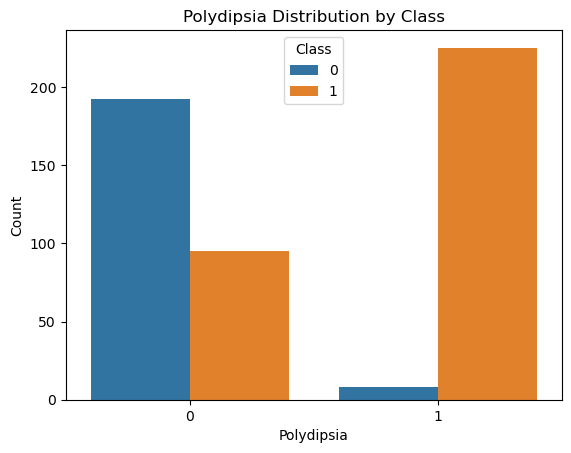

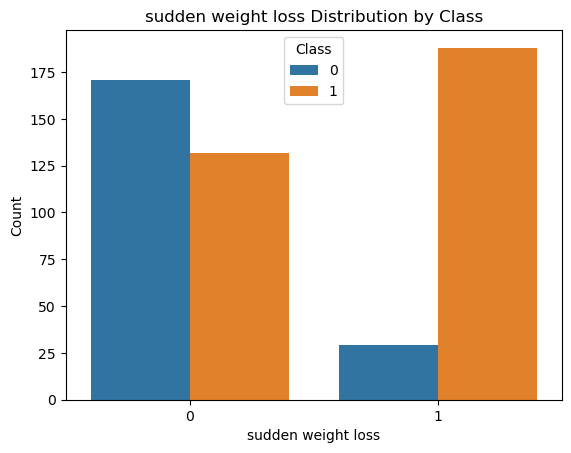

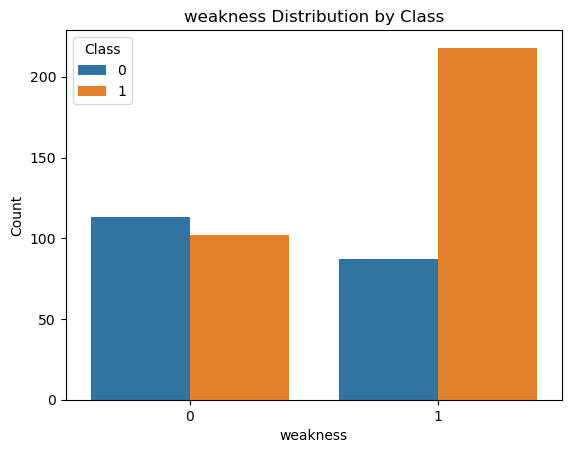

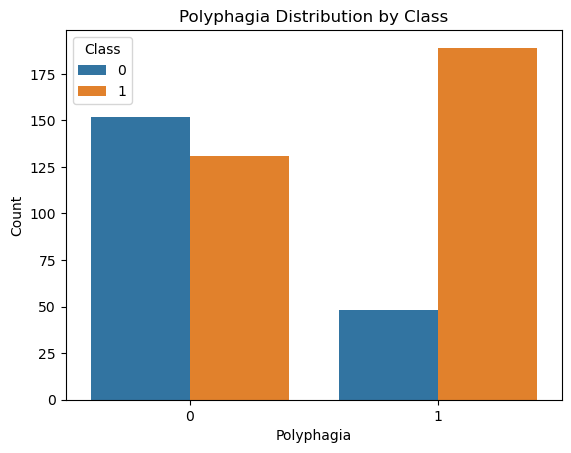

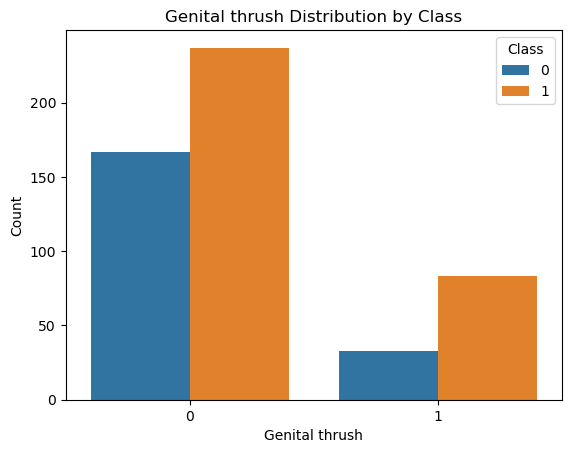

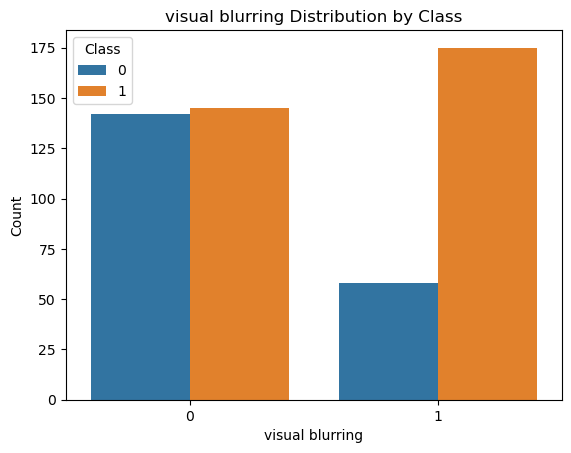

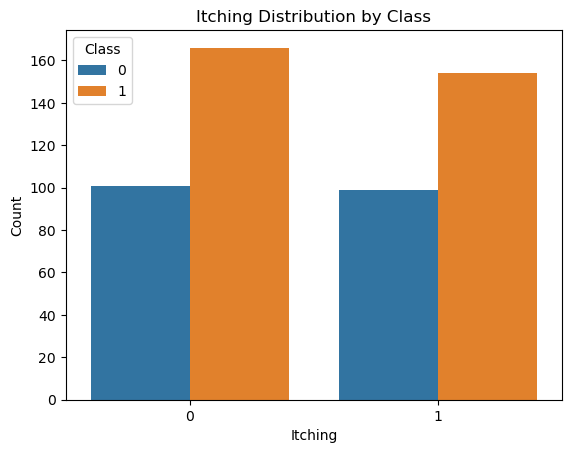

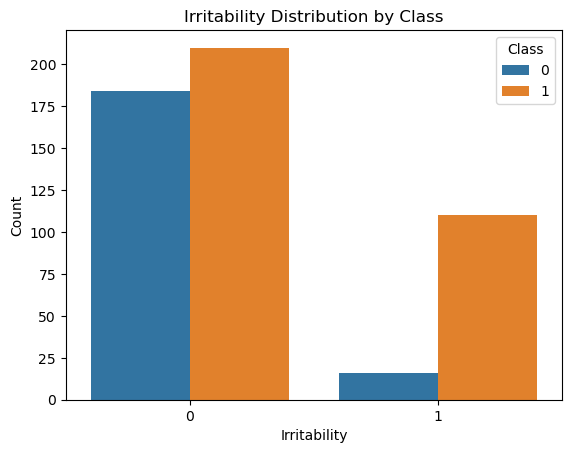

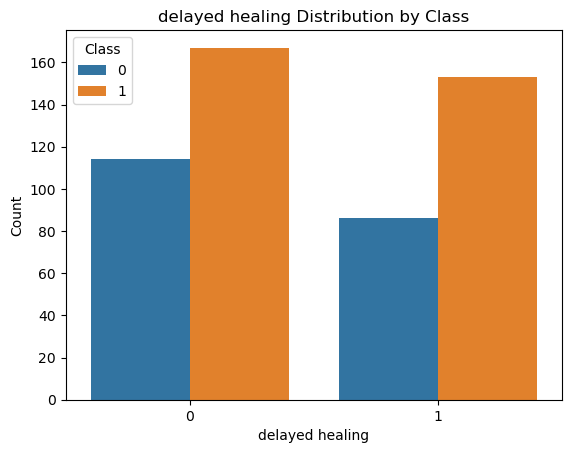

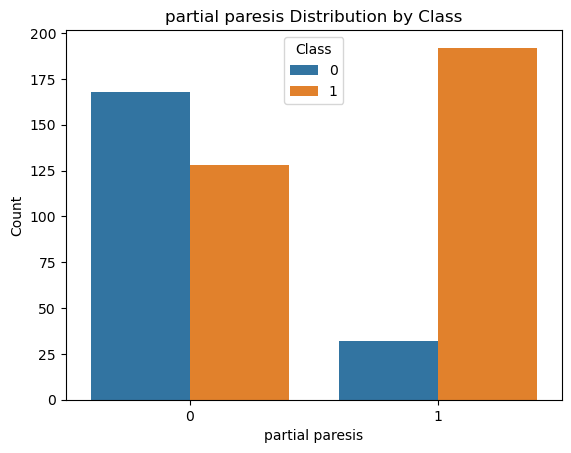

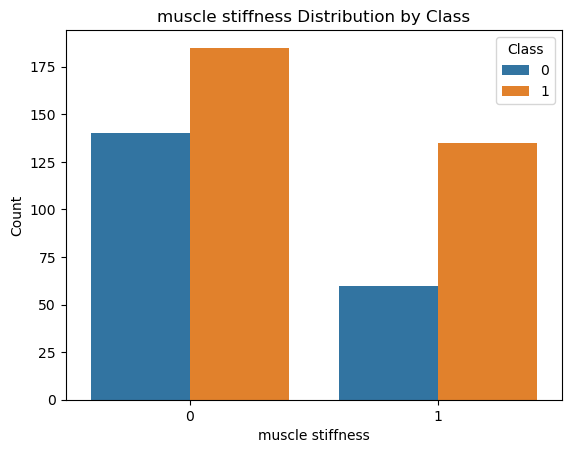

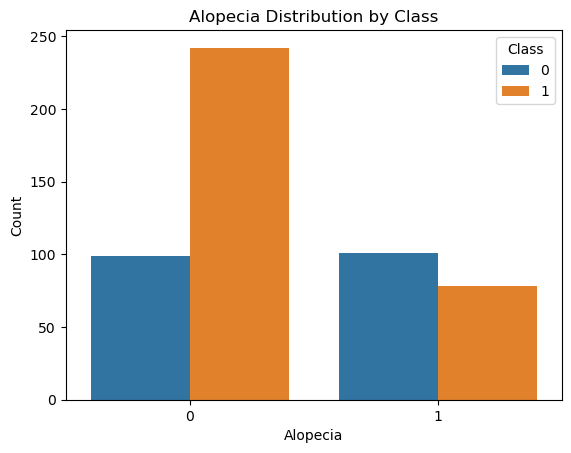

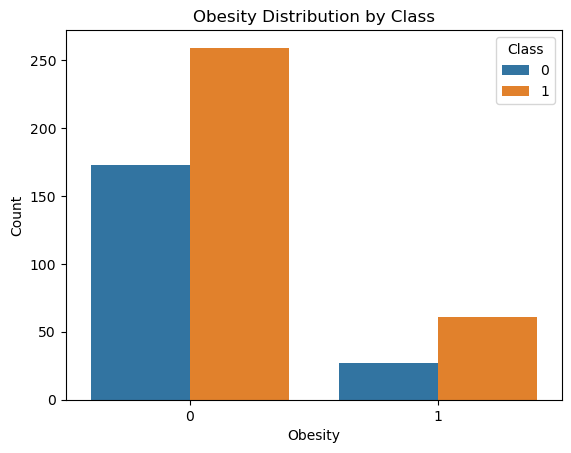

In [60]:
categorical_features = ['Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness', 'Polyphagia', 
                        'Genital thrush', 'visual blurring', 'Itching', 'Irritability', 
                        'delayed healing', 'partial paresis', 'muscle stiffness', 'Alopecia', 'Obesity']

for feature in categorical_features:
    sns.countplot(x=feature, hue='Class', data=dataset)
    plt.title(f'{feature} Distribution by Class')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()


In [62]:
from scipy.stats import ttest_ind

# Yaşa göre gruplandır
positive_class = dataset[dataset['Class'] == 1]
negative_class = dataset[dataset['Class'] == 0]

# T-testi uygulama
t_stat, p_value = ttest_ind(positive_class['Age'], negative_class['Age'])

print(f"T-statistic: {t_stat}, P-value: {p_value}")


T-statistic: 2.4882300316303065, P-value: 0.013151253540112715


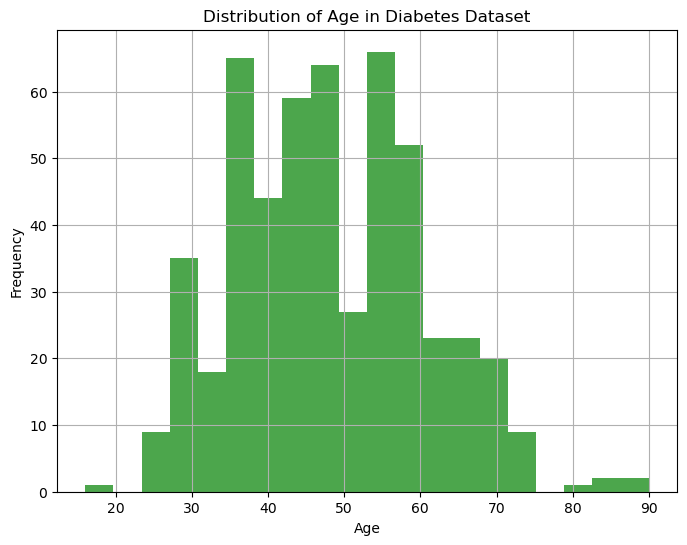

In [42]:
plt.figure(figsize=(8, 6))
plt.hist(dataset['Age'], bins=20, color='green', alpha=0.7)
plt.title('Distribution of Age in Diabetes Dataset')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

/Users/edakocaman/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


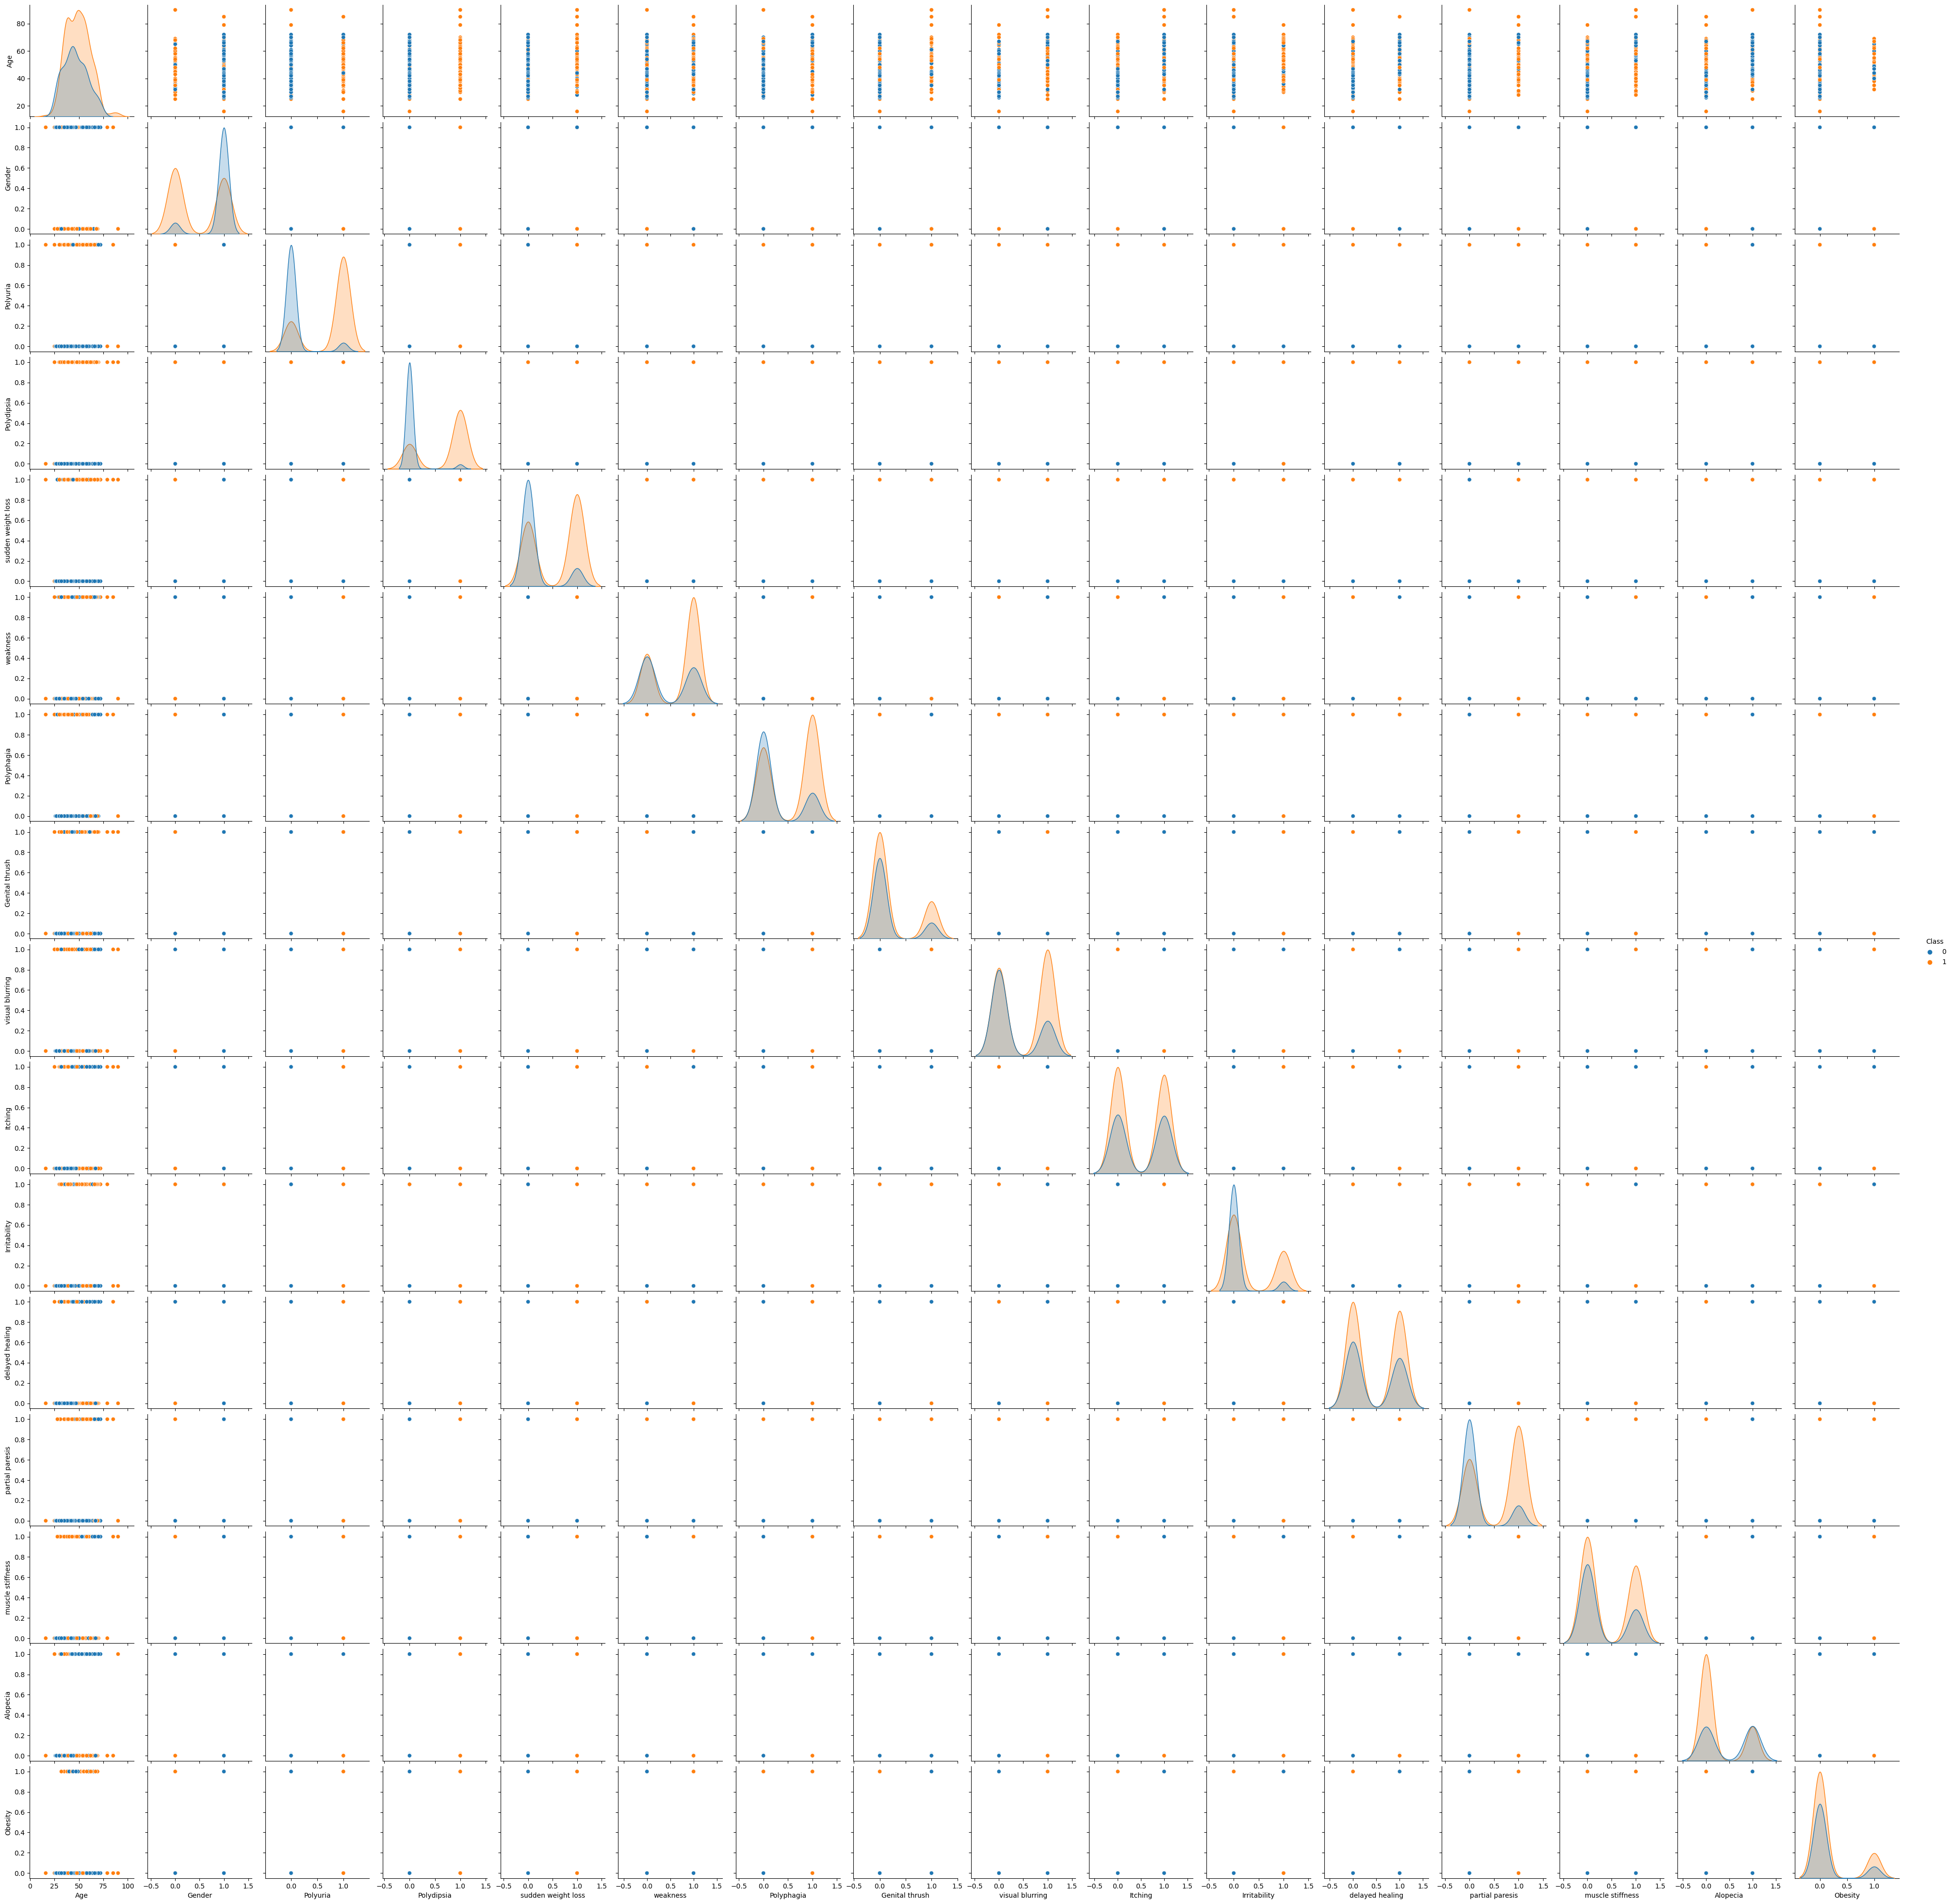

In [47]:
dataset.rename(columns={'class': 'Class'}, inplace=True)
sns.pairplot(dataset, hue='Class')
plt.show()

In [64]:
from scipy.stats import chi2_contingency

for feature in categorical_features:
    contingency_table = pd.crosstab(dataset[feature], dataset['Class'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"{feature} - Chi-square test: chi2 = {chi2}, p-value = {p}")


Polyuria - Chi-square test: chi2 = 227.86583895496773, p-value = 1.7409117803442155e-51
Polydipsia - Chi-square test: chi2 = 216.17163269578742, p-value = 6.1870096408863144e-49
sudden weight loss - Chi-square test: chi2 = 97.29630347827408, p-value = 5.969166262549937e-23
weakness - Chi-square test: chi2 = 29.767918414029744, p-value = 4.869843446585542e-08
Polyphagia - Chi-square test: chi2 = 59.595253537296315, p-value = 1.1651584346409135e-14
Genital thrush - Chi-square test: chi2 = 5.792148557528164, p-value = 0.016097902991938178
visual blurring - Chi-square test: chi2 = 31.808455832872244, p-value = 1.7015036753241196e-08
Itching - Chi-square test: chi2 = 0.046235436929134684, p-value = 0.8297483959485009
Irritability - Chi-square test: chi2 = 45.2083484408992, p-value = 1.7714831493959365e-11
delayed healing - Chi-square test: chi2 = 0.962093688113284, p-value = 0.32665993771439955
partial paresis - Chi-square test: chi2 = 95.38762744329154, p-value = 1.565289071056334e-22
musc

In [9]:
label_encoders = {}
for column in dataset.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    dataset[column] = le.fit_transform(dataset[column])
    label_encoders[column] = le


In [10]:
x=dataset.iloc[:,0:16]
y=dataset.iloc[:,16]
x_train, x_test, y_train, y_test=train_test_split(x,y, random_state=0, test_size=0.1)

In [11]:
print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))

468
468
52
52


In [12]:
sc_x=StandardScaler()
x_train=sc_x.fit_transform(x_train)
x_test=sc_x.fit_transform(x_test)

In [13]:
import math
sqrt_dataset=math.sqrt(416)
print(sqrt_dataset)

20.396078054371138


In [14]:
classifier=KNeighborsClassifier(n_neighbors=19, metric='euclidean')
classifier.fit(x_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=19)

In [15]:
y_pred=classifier.predict(x_test)
y_pred

array([1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0])

In [16]:
print(accuracy_score(y_test, y_pred))

0.8846153846153846


In [17]:
cm = confusion_matrix(y_test, y_pred)
print (cm)
print(f1_score(y_test, y_pred, average='micro'))

[[16  1]
 [ 5 30]]
0.8846153846153846


In [18]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)

Precision: 0.967741935483871
Recall: 0.8571428571428571


In [24]:
print(data.isnull().sum())

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64


In [25]:
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

In [26]:
X = data.drop('class', axis=1)
y = data['class']

In [27]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [29]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [30]:
rf = RandomForestClassifier(random_state=42)

In [31]:
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [32]:
best_rf = grid_search.best_estimator_

In [33]:
y_pred = best_rf.predict(X_test)

In [34]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")

Accuracy: 0.9903846153846154
F1 Score: 0.9921259842519685


In [36]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)

Precision: 1.0
Recall: 0.984375


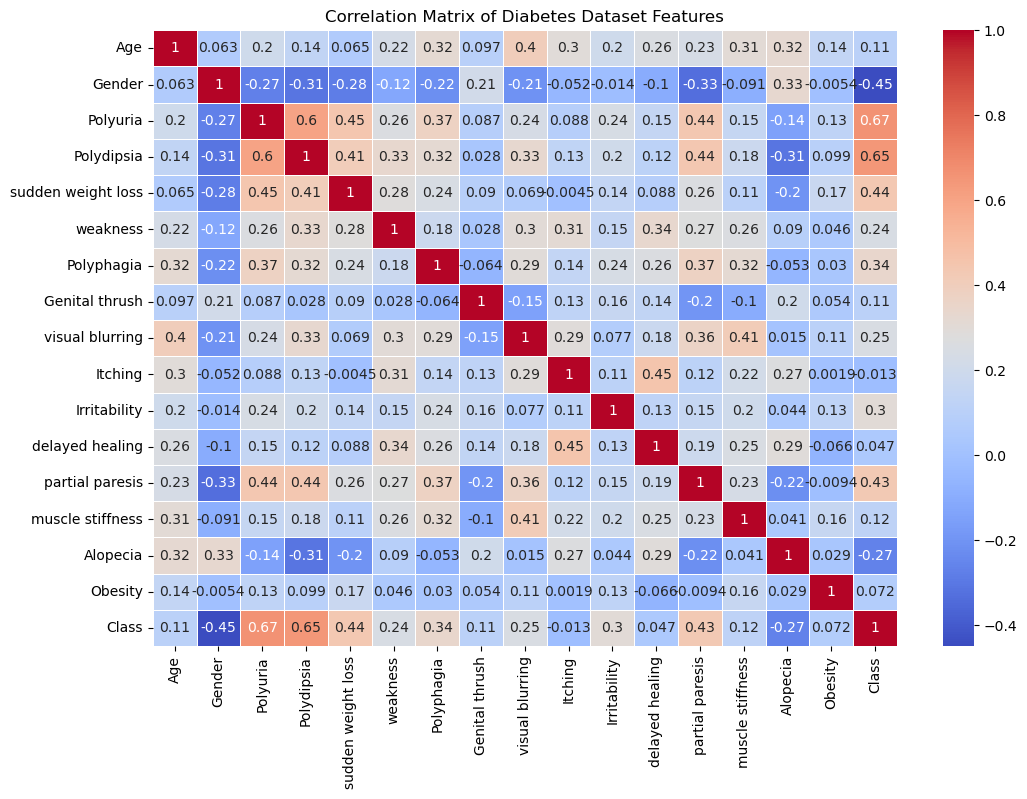

In [50]:
plt.figure(figsize=(12, 8))
correlation_matrix = dataset.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Diabetes Dataset Features')
plt.show()
